In [1]:
import pandas as pd
from datetime import datetime 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv("RollingSystemDemand_20210313_1912.csv", names =['HDR','date_time','Demand'],skiprows=[0, -1], 
                  skipfooter =1, header=None, engine='python')
df2 = pd.read_csv("RollingSystemDemand_20210313_1913.csv", names =['HDR','date_time','Demand'],skiprows=[0, -1], 
                  skipfooter =1, header=None, engine='python')


In [3]:
df = pd.concat([df1, df2])

In [4]:
df.shape

(3456, 3)

In [5]:
df.head()

,HDR,date_time,Demand
0,VD,20210201000000,28076
1,VD,20210201000500,28162
2,VD,20210201001000,28178
3,VD,20210201001500,28201
4,VD,20210201002000,28136


In [6]:
df = df.drop('HDR', 1)

In [7]:
df.head()

,date_time,Demand
0,20210201000000,28076
1,20210201000500,28162
2,20210201001000,28178
3,20210201001500,28201
4,20210201002000,28136


In [8]:
df['Date'] = df.apply(lambda row: datetime.strptime(str(row.date_time)[:4]+'-'+str(row.date_time)[5:6]+'-'+str(row.date_time)[6:8], 
                                                    '%Y-%m-%d').date(), axis=1)

df['Time'] = df.apply(lambda row: datetime.strptime(str(row.date_time)[8:10]+':'+str(row.date_time)[10:12]+':'+str(row.date_time)[12:], 
                                                    '%H:%M:%S').time(), axis=1)

In [9]:
df = df.drop('date_time', 1)
df.head()

,Demand,Date,Time
0,28076,2021-02-01,00:00:00
1,28162,2021-02-01,00:05:00
2,28178,2021-02-01,00:10:00
3,28201,2021-02-01,00:15:00
4,28136,2021-02-01,00:20:00


In [10]:
df['Hour'] = df.apply(lambda row: row.Time.hour, axis=1)

In [11]:
df.head()

,Demand,Date,Time,Hour
0,28076,2021-02-01,00:00:00,0
1,28162,2021-02-01,00:05:00,0
2,28178,2021-02-01,00:10:00,0
3,28201,2021-02-01,00:15:00,0
4,28136,2021-02-01,00:20:00,0


In [12]:
df.tail()

,Demand,Date,Time,Hour
1723,29323,2021-02-12,23:35:00,23
1724,29236,2021-02-12,23:40:00,23
1725,29071,2021-02-12,23:45:00,23
1726,28906,2021-02-12,23:50:00,23
1727,28801,2021-02-12,23:55:00,23


In [13]:
#bar_chart1 = df.groupby('Hour', as_index=False)['Demand'].mean()
bar_chart1 = df.groupby('Hour', as_index=False)['Demand'].sum()

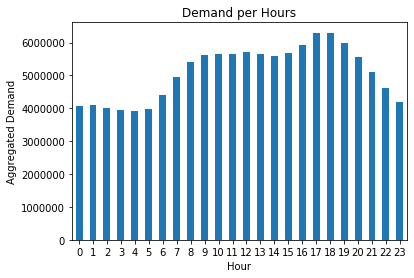

In [14]:
bar_chart1['Demand'].plot.bar()
plt.xticks(bar_chart1.index, rotation=0)
plt.title("Demand per Hours")
plt.xlabel("Hour")
plt.ylabel("Aggregated Demand")
plt.show()

The above graph demonstrates the power demand is low during the morning time from 12 AM to 5 AM. Then as the day started, the demand rose and the highest demand peak is at 5 pm and 6 pm as people came back home by this time. After that it started to drop as all the offices, malls, shops closed down and it was sleeping time.

In [15]:
bar_chart2 = df.groupby(['Date','Hour'], as_index=False)['Demand'].sum()

In [16]:
day_list = sorted(list(set(bar_chart2.Date)))
day_dict = {}
for i in range(len(day_list)):
    day_dict[day_list[i]] = 'Day'+str(i)

In [17]:
bar_chart2['dayhour'] = bar_chart2.apply(lambda row: day_dict[row.Date]+'Hour'+str(row.Hour), axis=1)

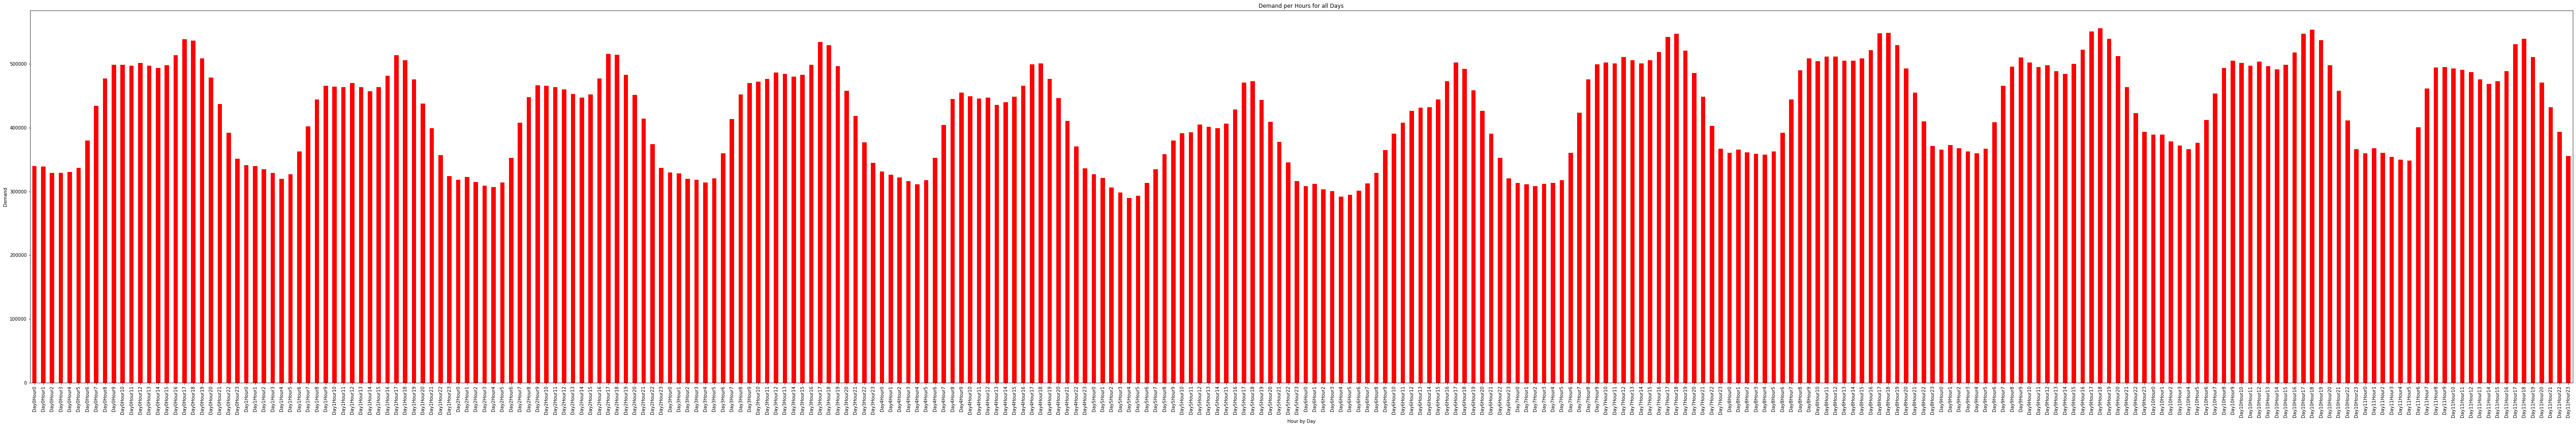

In [18]:
bar_chart2['Demand'].plot.bar(figsize=(100,15), color='red')
plt.xticks(bar_chart2.index, tuple(bar_chart2['dayhour']), rotation=90)
plt.title("Demand per Hours for all Days")
plt.xlabel("Hour by Day")
plt.ylabel("Demand")
plt.show()

This graph shows a similar pattern to the previous graph. during the morning time, power demand was low. Then it started to rise during the daylight and finally, the demand started to drop after 6 PM as everyone came back home by this time and prepared to end the day. 